In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Installing Required Libraries**

In [ ]:
!pip install transformers

     |████████████████████████████████| 133kB 3.7MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: awsebcli 3.19.2 has requirement PyYAML<5.4,>=5.3.1, but you'll have pyyaml 3.13 which is incompatible.
  Found existing installation: urllib3 1.26.2
    Uninstalling urllib3-1.26.2:
      Successfully uninstalled urllib3-1.26.2


In [ ]:
#
!pip install torch

In [ ]:
from transformers import XLNetConfig, XLNetTokenizer, XLNetForSequenceClassification


In [ ]:
!pip list | grep -E 'transformers|torch|Keras'


Keras                         2.4.3          
Keras-Preprocessing           1.1.2          
pytorch-transformers          1.2.0          
torch                         1.7.0+cu101    
torchsummary                  1.5.1          
torchtext                     0.3.1          
torchvision                   0.8.1+cu101    
transformers                  4.0.1          


**Reading Train and Test Dataset**

In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_file.txt', sep='{}{}{}', engine = 'python')
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test_file.txt", sep= '{}{}{}', engine = 'python')
devset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/devset.txt", sep= '{}{}{}', engine = 'python')

#from sklearn.model_selection import train_test_split

train, val =  train,test

**Data is Shuffled to Reduce Variance and Avoid Overfitting**

In [ ]:
from sklearn.utils import shuffle

train = shuffle(train)
train.head()

,Label,Text
3744,__label__ne,Pima County sheriff's deputies were able to id...
15590,__label__df,"Trust me, I've installed Windows 8 now on 4 x ..."
10846,__label__ds,Next Date Straight talking with Blood Red Sho...
4108,__label__ne,Eurogamer Network Ltd. uses cookies on its web...
1262,__label__ob,Meta I've been on the phone all week talking ...


In [ ]:
from sklearn.preprocessing import LabelEncoder

labels =train['Label'].values
label_encoder = LabelEncoder()    # Turns class labels into integers
Y = label_encoder.fit_transform(labels)

# Take note of how many unique labels there are in the data
num_labels = len(set(Y))


# Print out some examples
print('Number of unique labels:', num_labels)
print(type(labels), labels[:10])
print(type(Y), Y[:10])

Number of unique labels: 26
<class 'numpy.ndarray'> ['__label__ne' '__label__df' '__label__ds' '__label__ne' '__label__ob'
 '__label__ob' '__label__df' '__label__ne' '__label__ne' '__label__dp']
<class 'numpy.ndarray'> [12  1  3 12 13 13  1 12 12  2]


In [ ]:
train['labels'] = Y
train.head()

,Label,Text,labels
3744,__label__ne,Pima County sheriff's deputies were able to id...,12
15590,__label__df,"Trust me, I've installed Windows 8 now on 4 x ...",1
10846,__label__ds,Next Date Straight talking with Blood Red Sho...,3
4108,__label__ne,Eurogamer Network Ltd. uses cookies on its web...,12
1262,__label__ob,Meta I've been on the phone all week talking ...,13


In [ ]:
Y_val = label_encoder.fit_transform(test['Label'].values)

In [ ]:
trainDown = train[train['labels'].map(train['labels'].value_counts()) >= 802]
trainUp = train[train['labels'].map(train['labels'].value_counts()) <= 802]


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state = 0)

X_down, y_down = rus.fit_resample(trainDown,trainDown['labels'])
X_up, u_up = ros.fit_resample(trainUp, trainUp['labels'])

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:

# Get sentence data
sentences = train.Text.to_list()
sentences[0]

"Pima County sheriff's deputies were able to identify burglary suspects, and have arrested one of them following a tip from a viewer.  According to deputies, a burglary suspect cut a hole through a wall to break into a store. It happened on August 30. The owner of the Super H on Ruthrauff Road called deputies after she found her store ransacked. Deputies found a hole cut through the bathroom in the back of the store.  The suspect stole various things, including lottery tickets, which deputies were able to track. The suspects then tried to cash the tickets at various locations.  After releasing the surveillance photos, several tips came in about the suspect's identities. Donnie Wyatt Burt, 43, and David Aaron Mosseri, 29, are believed to be the suspects in the surveillance pictures.  Deputy Tom Peine tells Tucson News Now, Burt was located and arrested Friday night, following a tip from a viewer.  Anyone with information on Mosseri's whereabouts is asked to call 911 or 88-CRIME.  Deputi

In [ ]:
labels = train.Label.to_list()
print(labels[0])

__label__ne


In [ ]:
labels_val = val.Label.to_list()


In [ ]:
Xd = pd.DataFrame(X_down, columns = ['Label','Text','label'])
#Xd=Xd[Xd.Label_enc != 6]
Xd['label'].value_counts()

22    802
20    802
14    802
13    802
12    802
4     802
1     802
Name: label, dtype: int64

In [ ]:
Xd.head()

,Label,Text,label
0,__label__df,"One commenter had this to say ""... Here's a qu...",1
1,__label__df,BCFC.freeforums.org Welcome to the forum. You...,1
2,__label__df,What is Spice Lifestyle? There are many curiou...,1
3,__label__df,I'll be in Aus for a week from Saturday. Does ...,1
4,__label__df,I have been searching for how to do this and I...,1


In [ ]:
Xu = pd.DataFrame(X_up, columns = ['Label','Text','label'])
Xu['label'].value_counts()

25    802
24    802
2     802
3     802
5     802
6     802
7     802
8     802
9     802
10    802
11    802
15    802
16    802
17    802
18    802
19    802
20    802
21    802
23    802
0     802
Name: label, dtype: int64

In [ ]:
Xu = Xu[Xu.label != 20]
Xu['label'].value_counts()

25    802
10    802
2     802
3     802
5     802
6     802
7     802
8     802
9     802
11    802
24    802
15    802
16    802
17    802
18    802
19    802
21    802
23    802
0     802
Name: label, dtype: int64

In [ ]:
new_df = pd.concat([Xd,Xu]).reset_index(drop=True)
new_df['label'].value_counts()

25    802
24    802
1     802
2     802
3     802
4     802
5     802
6     802
7     802
8     802
9     802
10    802
11    802
12    802
13    802
14    802
15    802
16    802
17    802
18    802
19    802
20    802
21    802
22    802
23    802
0     802
Name: label, dtype: int64

In [ ]:
new_df['label'].values

array([1, 1, 1, ..., 25, 25, 25], dtype=object)

**Make training data**

Make raw data into trainable data for XLNet, including:

Set gpu environment
Load tokenizer and tokenize
Set 3 embedding, token embedding, mask word embedding, segmentation embedding
Split data set into train and validate, then send them to dataloader

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()

In [ ]:
n_gpu

1

In [ ]:
vocabulary = '/content/drive/My Drive/Colab Notebooks/xlnet-base-cased-spiece.model'
vocabulary 

'/content/drive/My Drive/Colab Notebooks/xlnet-base-cased-spiece.model'

### Configuring MaxLen
This is the most optimum length for training our model, I found

In [ ]:
max_len  = 256

### Tokenizer

In [ ]:

# With cased model, set do_lower_case = False
tokenizer = XLNetTokenizer(vocab_file=vocabulary,do_lower_case=False)

In [ ]:
var = tokenizer("I am doing my NLP thesis, not project")
print(var['input_ids'])
print(var['token_type_ids'])
print(var['attention_mask'])
print(tokenizer.tokenize("I am doing my NLP thesis, not project"))
print(tokenizer.encode('_thesis'))
print(tokenizer.decode(3))

[35, 569, 690, 94, 578, 7286, 13300, 19, 50, 686, 4, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
['▁I', '▁am', '▁doing', '▁my', '▁N', 'LP', '▁thesis', ',', '▁not', '▁project']
[225, 305, 6142, 4, 3]
<cls>


In [ ]:
tokenizer.convert_ids_to_tokens(var['input_ids'])


['▁I',
 '▁am',
 '▁doing',
 '▁my',
 '▁N',
 'LP',
 '▁thesis',
 ',',
 '▁not',
 '▁project',
 '<sep>',
 '<cls>']

In [ ]:
tokenizer.encode('word')

[1139, 4, 3]

### The Embedding Process

In [ ]:
# train.sample(10)

In [ ]:
# Create sentence and label lists
sentences = new_df.Text.values

In [ ]:
sent_val = val.Text.values

In [ ]:
sentences = [sentence + " [SEP] [CLS]" for sentence in sentences]
sent_val = [sent + " [SEP] [CLS]" for sent in sent_val]
labels = new_df['label'].values.astype(int)
lab_val = Y_val

In [ ]:
#new_df['label'].values.astype(int)

In [ ]:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=True)

tokenized_texts_train = [tokenizer.tokenize(sent) for sent in sentences]
tokenized_texts_val = [tokenizer.tokenize(sent) for sent in sent_val]
print ("Tokenize the first sentence:")
print (tokenized_texts_train[0])
print("Tokenized test sentence:")
print(tokenized_texts_val[0])

Tokenize the first sentence:
['▁one', '▁comment', 'er', '▁had', '▁this', '▁to', '▁say', '▁', '"', '.', '.', '.', '▁here', "'", 's', '▁a', '▁quote', '▁and', '▁it', '▁is', '▁true', ':', '▁the', '▁line', '▁between', '▁', '"', 'making', '"', '▁and', '▁', '"', 'taking', '"', '▁is', '▁not', '▁a', '▁racial', '▁line', '.', '▁the', '▁biggest', '▁government', '▁program', '▁we', '▁have', ',', '▁medic', 'are', ',', '▁benefits', '▁a', '▁population', '▁that', '▁is', '▁8', '5%', '▁white', '.', '▁those', '▁are', '▁the', '▁same', '▁white', '▁people', '▁that', '▁voted', '▁for', '▁', 'rom', 'ney', '.', '▁according', '▁to', '▁the', '▁', 're', 'pub', 's', ',', '▁they', '▁are', '▁the', '▁', '"', 'taker', 's', '"', ',', '▁but', '▁blame', '▁those', '▁that', '▁voted', '▁for', '▁ob', 'ama', '.', '▁', '.', '.', '.', '.', '.', '.', '"', '▁da', 've', '▁___', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '▁10', '▁years', '▁ago', '▁the', '▁', 'usa', '▁h

### Inputs

For tokenizing sentence, we need following parameters:

input ids: Input tokens matched to index number in tokenizer (numbers)

segment mask: (optional) a sequence of 1s and 0s used to identify whether the input is one sentence or two sentences long. We dont use it in our task. 

attention mask: (optional) a sequence of 1s and 0s. 1s represent all input tokens and 0s represent all padding tokens 

labels: In our case, we have multilabel

In [ ]:
# Set the maximum sequence length. 
MAX_LEN = 256

In [ ]:
# Use the XLNet tokenizer to convert the tokens to their index numbers in the XLNet vocabulary
input_ids_train = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts_train]
input_ids_val = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts_val]

In [ ]:
# Pad our input tokens
from keras.preprocessing.sequence import pad_sequences

input_ids_train = pad_sequences(input_ids_train, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
input_ids_val = pad_sequences(input_ids_val, maxlen = MAX_LEN, dtype = "long",truncating = "post", padding = "post")

### Creating Attention Masks

In [ ]:
# Create attention masks
attention_masks_train = []

# Create a mask of 1s for each token. 0s represent padding
for sequence in input_ids_train:
  sequence_mask = [float(i>0) for i in sequence]
  attention_masks_train.append(sequence_mask)

In [ ]:
attention_masks_val = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids_val:
  seq_mask = [float(i>0) for i in seq]
  attention_masks_val.append(seq_mask)

In [ ]:

train_inputs, train_labels = input_ids_train, labels

train_masks, _= attention_masks_train, input_ids_train

In [ ]:
#Now for validation input and validation mask
validation_inputs, validation_labels = input_ids_val, lab_val
validation_masks,_=attention_masks_val,input_ids_val

In [ ]:
# Convert all of our data into torch tensors, the required datatype for our model

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Select a batch size for training. For fine-tuning with XLNet, the authors recommend a batch size of 32, 48, or 128. We will use 32 here to avoid memory issues. In our case 16 gives best result
batch_size = 16

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data_tensor = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler_random = RandomSampler(train_data_tensor)
train_dataloader = DataLoader(train_data_tensor, sampler=train_sampler_random, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


In [ ]:
# Load XLNEtForSequenceClassification, the pretrained XLNet model with a single linear classification layer on top. 

model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=26)
model.cuda()

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.weight', 'sequence_summary.summary.bias', 'logits_proj.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

XLNetForSequenceClassification(
  (transformer): XLNetModel(
    (word_embedding): Embedding(32000, 768)
    (layer): ModuleList(
      (0): XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (layer_1): Linear(in_features=768, out_features=3072, bias=True)
          (layer_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (1): XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e

In [ ]:

param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [ ]:
!pip install pytorch-transformers

In [ ]:
!pip install awscli awsebcli urllib3>=1.25.4 --upgrade

ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: awsebcli 3.19.2 has requirement PyYAML<5.4,>=5.3.1, but you'll have pyyaml 3.13 which is incompatible.
ERROR: awsebcli 3.19.2 has requirement urllib3<1.26,>=1.25.4, but you'll have urllib3 1.26.2 which is incompatible.


In [ ]:
from pytorch_transformers import AdamW

# This variable contains all of the hyperparemeter information our training loop needs
optimizer = AdamW(optimizer_grouped_parameters,
                     lr=2e-5)

In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:

import numpy as np
from tqdm import tqdm, trange

# Store our loss and accuracy for plotting
train_loss_set = []
train_loss_batch = []
train_acc_set = []
val_loss_set = []
val_acc_set = []

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):
  
  
  # Training
  
  # Set our model to training mode (as opposed to evaluation mode)
  model.train()
  
  # Tracking variables
  tracking_loss = 0
  nb_tracking_examples, nb_tracking_steps = 0, 0
  
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()
    # Forward pass
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    loss = outputs[0]
    logits = outputs[1]
    train_loss_set.append(loss.item())    
    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    
    
    # Update tracking variables
    epoch_train_acc = 0
    epoch_train_loss = 0
    tracking_loss += loss.item()
    nb_tracking_examples += b_input_ids.size(0)
    nb_tracking_steps += 1

    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    tmp_train_accuracy = flat_accuracy(logits,label_ids)
    epoch_train_acc += tmp_train_accuracy
    epoch_train_loss += loss
    nb_tracking_steps +=1

  train_acc = epoch_train_acc/nb_tracking_steps
  train_loss = epoch_train_loss/nb_tracking_steps

  train_loss_set.append(train_loss)
  train_acc_set.append(train_acc)

  print("Train loss: {}".format(train_loss_set))
  print("Train Accuracy: {}".format(train_acc_set))  
    
  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
      logits = output[0]
    
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

    val_accuracy = eval_accuracy/nb_eval_steps

  print("Validation Accuracy: {}".format(val_accuracy))
  #print("Train Accuracy: {}".format(train_acc))

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/pytorch_transformers/optimization.py:166: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  exp_avg.mul_(beta1).add_(1.0 - beta1, grad)


Train loss: [3.5132558345794678, 3.4877476692199707, 3.3538637161254883, 3.3637609481811523, 3.210570812225342, 3.3549551963806152, 3.2374045848846436, 3.308347225189209, 3.405611038208008, 3.1994357109069824, 3.2423083782196045, 3.2877323627471924, 3.364497661590576, 3.239871025085449, 3.43900990486145, 3.3338613510131836, 3.2657792568206787, 3.3224494457244873, 3.3745529651641846, 3.2906079292297363, 3.1222035884857178, 3.289388418197632, 3.263108015060425, 3.13494873046875, 3.254863977432251, 3.2146828174591064, 3.114427328109741, 3.0436928272247314, 2.9417829513549805, 3.2938129901885986, 3.032174825668335, 3.2156198024749756, 3.120021343231201, 3.141101121902466, 3.2204012870788574, 3.1255552768707275, 3.2807719707489014, 3.0834100246429443, 3.146794319152832, 3.173523426055908, 3.043288230895996, 2.972917318344116, 3.0675010681152344, 3.227708578109741, 2.7833752632141113, 3.1488406658172607, 2.9757938385009766, 3.029768705368042, 3.060002565383911, 3.0299787521362305, 3.04126334

Epoch:  25%|██▌       | 1/4 [08:50<26:30, 530.26s/it]

Validation Accuracy: 0.697841726618705
Train loss: [3.5132558345794678, 3.4877476692199707, 3.3538637161254883, 3.3637609481811523, 3.210570812225342, 3.3549551963806152, 3.2374045848846436, 3.308347225189209, 3.405611038208008, 3.1994357109069824, 3.2423083782196045, 3.2877323627471924, 3.364497661590576, 3.239871025085449, 3.43900990486145, 3.3338613510131836, 3.2657792568206787, 3.3224494457244873, 3.3745529651641846, 3.2906079292297363, 3.1222035884857178, 3.289388418197632, 3.263108015060425, 3.13494873046875, 3.254863977432251, 3.2146828174591064, 3.114427328109741, 3.0436928272247314, 2.9417829513549805, 3.2938129901885986, 3.032174825668335, 3.2156198024749756, 3.120021343231201, 3.141101121902466, 3.2204012870788574, 3.1255552768707275, 3.2807719707489014, 3.0834100246429443, 3.146794319152832, 3.173523426055908, 3.043288230895996, 2.972917318344116, 3.0675010681152344, 3.227708578109741, 2.7833752632141113, 3.1488406658172607, 2.9757938385009766, 3.029768705368042, 3.06000256

Epoch:  50%|█████     | 2/4 [17:41<17:40, 530.41s/it]

Validation Accuracy: 0.7014388489208633
Train loss: [3.5132558345794678, 3.4877476692199707, 3.3538637161254883, 3.3637609481811523, 3.210570812225342, 3.3549551963806152, 3.2374045848846436, 3.308347225189209, 3.405611038208008, 3.1994357109069824, 3.2423083782196045, 3.2877323627471924, 3.364497661590576, 3.239871025085449, 3.43900990486145, 3.3338613510131836, 3.2657792568206787, 3.3224494457244873, 3.3745529651641846, 3.2906079292297363, 3.1222035884857178, 3.289388418197632, 3.263108015060425, 3.13494873046875, 3.254863977432251, 3.2146828174591064, 3.114427328109741, 3.0436928272247314, 2.9417829513549805, 3.2938129901885986, 3.032174825668335, 3.2156198024749756, 3.120021343231201, 3.141101121902466, 3.2204012870788574, 3.1255552768707275, 3.2807719707489014, 3.0834100246429443, 3.146794319152832, 3.173523426055908, 3.043288230895996, 2.972917318344116, 3.0675010681152344, 3.227708578109741, 2.7833752632141113, 3.1488406658172607, 2.9757938385009766, 3.029768705368042, 3.0600025

Epoch:  75%|███████▌  | 3/4 [26:25<08:48, 528.76s/it]

Validation Accuracy: 0.7153776978417267
Train loss: [3.5132558345794678, 3.4877476692199707, 3.3538637161254883, 3.3637609481811523, 3.210570812225342, 3.3549551963806152, 3.2374045848846436, 3.308347225189209, 3.405611038208008, 3.1994357109069824, 3.2423083782196045, 3.2877323627471924, 3.364497661590576, 3.239871025085449, 3.43900990486145, 3.3338613510131836, 3.2657792568206787, 3.3224494457244873, 3.3745529651641846, 3.2906079292297363, 3.1222035884857178, 3.289388418197632, 3.263108015060425, 3.13494873046875, 3.254863977432251, 3.2146828174591064, 3.114427328109741, 3.0436928272247314, 2.9417829513549805, 3.2938129901885986, 3.032174825668335, 3.2156198024749756, 3.120021343231201, 3.141101121902466, 3.2204012870788574, 3.1255552768707275, 3.2807719707489014, 3.0834100246429443, 3.146794319152832, 3.173523426055908, 3.043288230895996, 2.972917318344116, 3.0675010681152344, 3.227708578109741, 2.7833752632141113, 3.1488406658172607, 2.9757938385009766, 3.029768705368042, 3.0600025

Epoch: 100%|██████████| 4/4 [35:09<00:00, 527.31s/it]

Validation Accuracy: 0.739658273381295


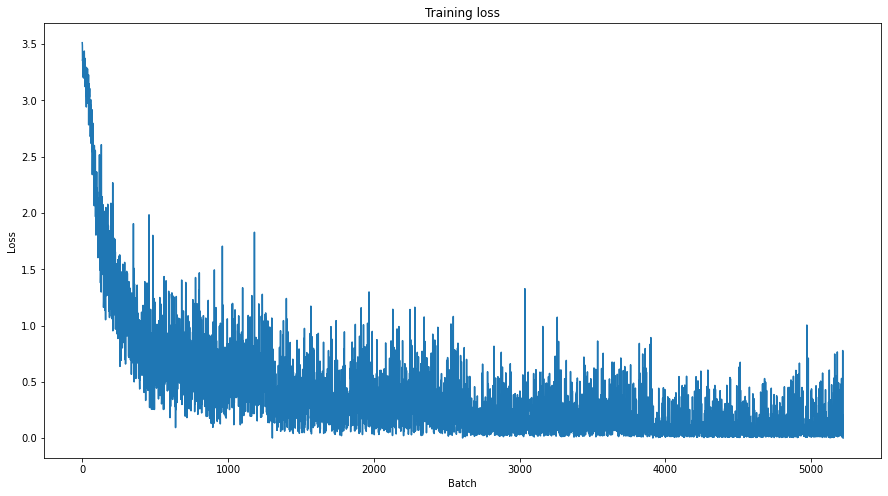

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

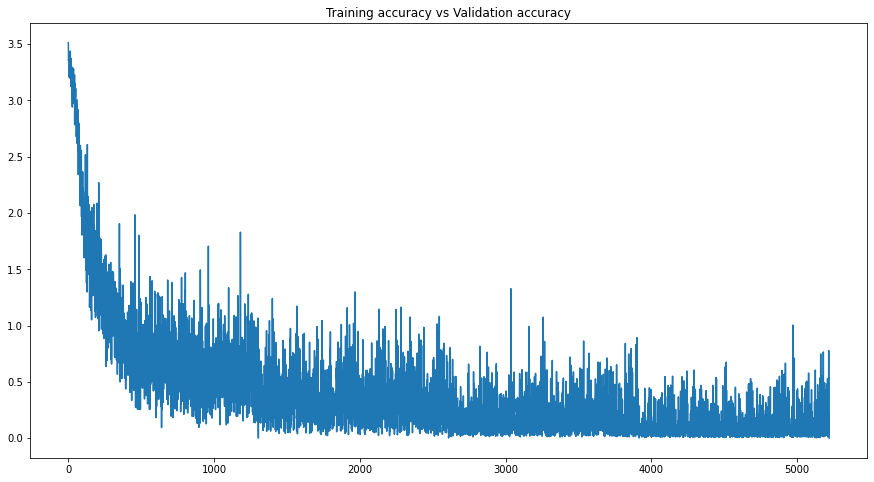

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Training accuracy vs Validation accuracy")
# plt.xlabel("Batch")
# plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

In [ ]:
devset.head()

,Label,Text
0,__label__ht,Chances are you have huge amounts of LEGO lyin...
1,__label__ht,Being a successful employee is similar to runn...
2,__label__ht,How would one go about making this song the of...
3,__label__ht,Tips for Storing Cookies How to Store and Kee...
4,__label__ht,Surviving the Sucker Punch Written by Mannie ...


### Predict and Evaluate on Holdout Set


In [ ]:

# Create sentence and label lists
sentence_dev = devset.Text.values

# We need to add special tokens at the beginning and end of each sentence for XLNet to work properly
sentence_dev = [sentence + " [SEP] [CLS]" for sentence in sentence_dev]
labels_ = label_encoder.fit_transform(devset.Label.values)


tokenized_texts = [tokenizer.tokenize(sent) for sent in sentence_dev]


MAX_LEN = 128
# Use the XLNet tokenizer to convert the tokens to their index numbers in the XLNet vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels_)
  
batch_size = 16  


prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
# Prediction on test set

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  # Telling the model not to compute or store gradients, saving memory and speeding up prediction
  with torch.no_grad():
    # Forward pass, calculate logit predictions
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

In [ ]:
# for pred in predictions:
#   print(np.argmax(pred,axis=1))

print(true_labels)

[array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]), array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]), array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]), array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]), array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]), array([ 9,  9, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,  1,  1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([ 1, 16,

In [ ]:
# from sklearn.metrics import classification_report
# y_true = true_labels
# y_pred = np.argmax(predictions)
# print(classification_report(y_true, y_pred))

In [ ]:
# Import and evaluate each test batch using Matthew's correlation coefficient
from sklearn.metrics import matthews_corrcoef
matthews_set = []

for i in range(len(true_labels)):
  matthews = matthews_corrcoef(true_labels[i],
                 np.argmax(predictions[i], axis=1).flatten())
  matthews_set.append(matthews)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [ ]:
matthews_set

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7453783886776517,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6831300510639733,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4958204282224728,
 0.0,
 0.5050762722761054,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6801088261189652,
 0.0,
 0.0,
 0.2548509505142025,
 0.0,
 0.2923136380967478,
 0.0,
 0.0,
 0.6483527187784863,
 0.0,
 0.0,
 0.0,
 0.300964632714423,
 0.25896619868911863,
 0.0,
 0.0,
 0.5820908754086792,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5608750963198337,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7968798037362896,
 0.31652708247382866,
 0.4336616683635956,


In [ ]:
# Flatten the predictions and true values for aggregate Matthew's evaluation on the whole dataset
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
flat_true_labels = [item for sublist in true_labels for item in sublist]


In [ ]:
matthews_corrcoef(flat_true_labels, flat_predictions)


0.6793025714748516

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(flat_true_labels, flat_predictions))

              precision    recall  f1-score   support

           0       0.37      0.61      0.46        31
           1       0.84      0.64      0.72       179
           2       0.39      0.40      0.39        30
           3       0.62      0.70      0.65        69
           4       0.49      0.64      0.55       157
           5       0.84      0.78      0.81        46
           6       0.44      0.40      0.42        10
           7       0.33      0.50      0.40         2
           8       0.62      0.80      0.70        20
           9       0.67      0.73      0.70        82
          10       0.09      0.09      0.09        33
          11       0.61      0.70      0.66        27
          12       0.94      0.70      0.80       790
          13       0.55      0.60      0.57       206
          14       0.60      0.67      0.63       171
          15       0.50      0.20      0.29         5
          16       0.73      0.89      0.80        90
          17       0.87    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
